In [1]:
import sumie
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import skimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
model = torchvision.models.vgg16(pretrained=True).eval()
sumie.utils.remove_inplace(model)
#model.features[30] = torch.nn.AdaptiveMaxPool2d((7,7))

100%|██████████| 256/256 [00:25<00:00,  9.20it/s]


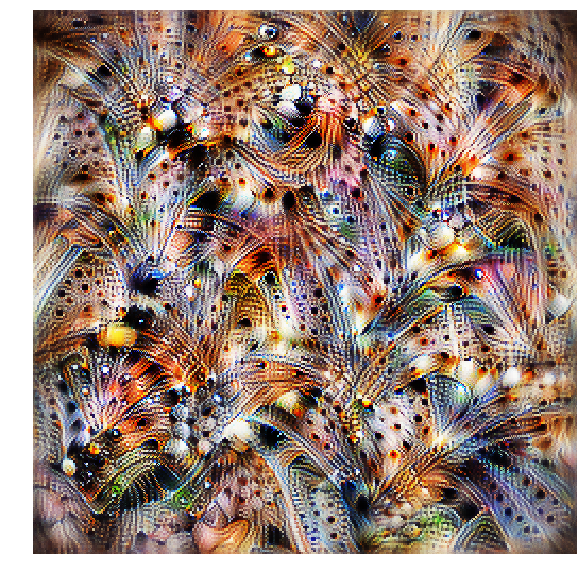

In [33]:
import random

def alternate(opt, i):
    #r = random.random()
    #opt.image.transforms[3].factor = 0.1 + 0.9*r
    #opt.objective.weights = [1-r, r]
    if i <= 256:
        opt.image.transforms[3].factor = 0.2
        opt.objective.weights = [1, 0]
    else:
        opt.image.transforms[3].factor = 1
        opt.objective.weights = [0, 1]


im = sumie.Image((512, 512), param='fft', transforms=[
                    sumie.experimental.SmoothDownsample(2),
                    sumie.transforms.RotationJitter(0.1),
                    sumie.transforms.PositionJitter(8),
                    sumie.transforms.ScaleJitter(1.01),
                    sumie.transforms.Normalise(),
              ]
            )

device = 'cuda'
im.to(device)
model.to(device)
channel1 = sumie.objectives.ConvChannel(model.features[29], 15)
channel2 = sumie.objectives.ConvChannel(model.features[14], 22)
combined = sumie.objectives.Composite([channel1, channel2], [10, 1])
opt = sumie.Optimiser(im, model.features, combined)
#opt.add_callback(alternate)

opt.run(iterations=256, progress=True, lr=0.005, output='tmp', output_skip=5)
sumie.vis.show(im.get_image(), figsize=(10,10))

tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(-12.5333, device='cuda:0', grad_fn=<MeanBackward1>)


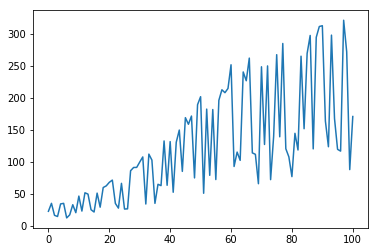

In [28]:
plt.plot([x.item() for x in opt.history])
for child in combined.children:
    print(child.objective)

100%|██████████| 128/128 [00:12<00:00, 10.62it/s]


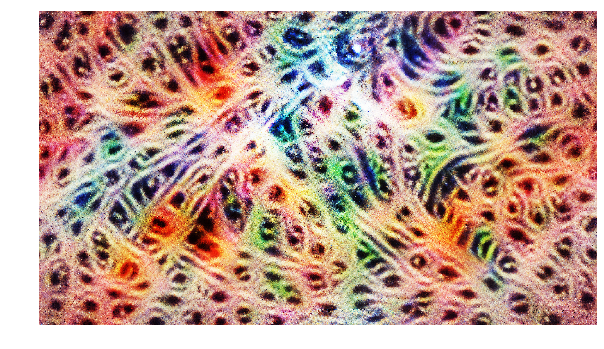

In [5]:
opt.image.transforms[3].factor = 1
opt.objective = channel2

opt.run(iterations=128, progress=True, lr=0.05, output='tmp', output_skip=5)
sumie.vis.show(im.get_image(), figsize=(10,10))

100%|██████████| 128/128 [00:33<00:00,  3.82it/s]


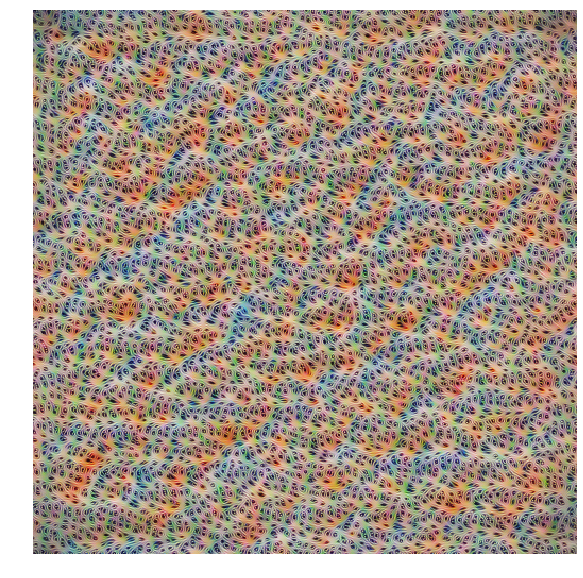

In [6]:
im = sumie.Image(512, param='fft', transforms=[
                    sumie.transforms.PositionJitter(2),
                    sumie.transforms.Interpolate(1),
                    sumie.transforms.PositionJitter(32),
                    #Downsample(0.125/16),
                    sumie.transforms.Interpolate(1),
                    sumie.transforms.RotationJitter(0.1),
                    sumie.transforms.PositionJitter(8),
                    sumie.transforms.ScaleJitter(1.01),
                    sumie.transforms.Normalise(),
              ]
            )
im.to(device)
channel2 = sumie.objectives.ConvChannel(model.features[14], 22)
opt = sumie.Optimiser(im, model.features, channel2)

opt.run(iterations=128, progress=True, lr=0.05)
sumie.vis.show(im.get_image(), figsize=(10,10))

100%|██████████| 256/256 [00:07<00:00, 34.43it/s]


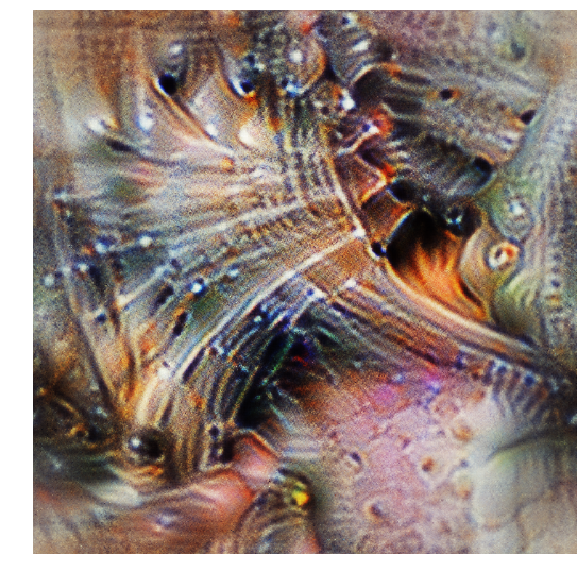

In [7]:

im = sumie.Image(512, param='fft', transforms=[
                    sumie.transforms.PositionJitter(2),
                    sumie.transforms.Interpolate(0.6),
                    sumie.transforms.PositionJitter(32),
    sumie.transforms.Interpolate(0.6),
    sumie.transforms.PositionJitter(16),
                    #Downsample(0.125/16),
                    sumie.transforms.Interpolate(0.6, prefilter=0),
                    sumie.transforms.RotationJitter(0.1),
                    sumie.transforms.PositionJitter(8),
                    sumie.transforms.ScaleJitter(1.01),
                    sumie.transforms.Normalise(),
              ]
            )
im.to(device)
model.to(device)
channel1 = sumie.objectives.ConvChannel(model.features[30], 15)
channel2 = sumie.objectives.ConvChannel(model.features[10], 22)
combined = sumie.objectives.Composite([channel1, channel2], [1, 1])
opt = sumie.Optimiser(im, model.features, channel1)

opt.run(iterations=256, progress=True, lr=0.025)
sumie.vis.show(im.get_image(), figsize=(10,10))

In [8]:
device='cuda'